In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')

In [2]:
df = pd.read_csv("cleaned_scaled_data.csv")
df.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate
0,0.218182,0.153846,0.2,0.37500,0.500000,0.486486,1.0,1.0,0.0,1.0,0.647059
1,0.218182,0.307692,0.3,0.25625,0.166667,0.551351,0.0,0.0,0.0,0.0,0.470588
2,0.309091,0.307692,0.3,0.28125,0.166667,0.621622,1.0,0.0,0.0,0.0,0.411765
3,0.181818,0.230769,0.3,0.26250,0.166667,0.572973,0.0,0.0,0.0,0.0,0.470588
4,0.181818,0.153846,0.2,0.28125,0.166667,0.532432,0.0,0.0,0.0,0.0,0.470588


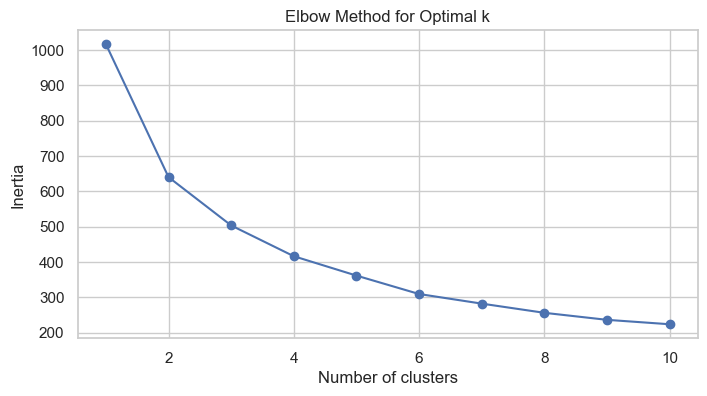

In [3]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df)

In [5]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df)

In [6]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster']))
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
df_tsne = tsne.fit_transform(df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2']))
df['TSNE1'] = df_tsne[:, 0]
df['TSNE2'] = df_tsne[:, 1]

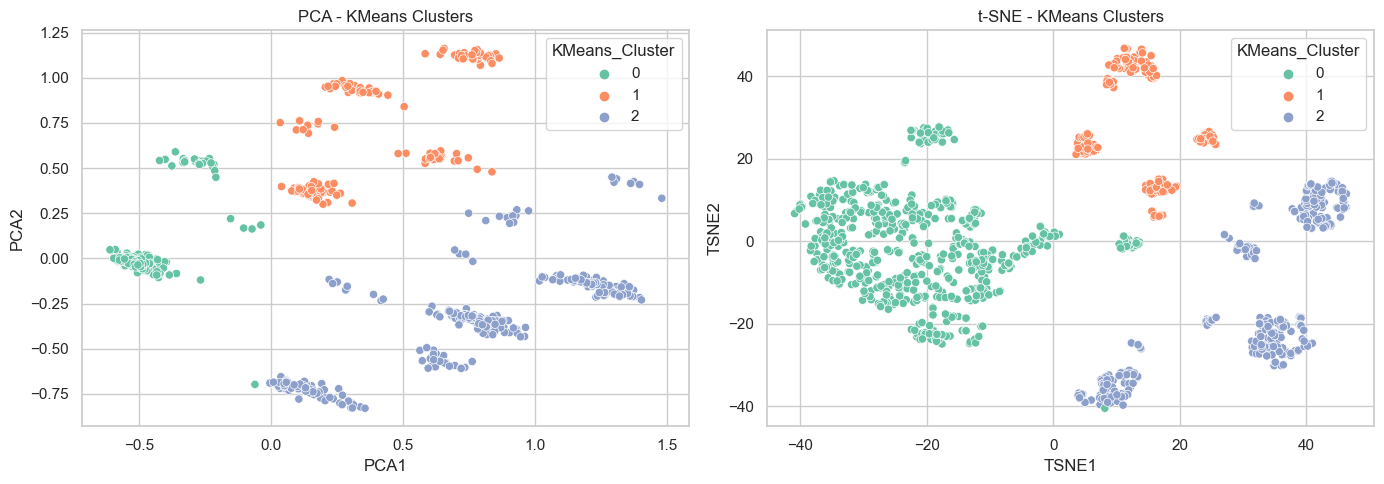

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans_Cluster', ax=axs[0], palette='Set2')
axs[0].set_title("PCA - KMeans Clusters")

sns.scatterplot(data=df, x='TSNE1', y='TSNE2', hue='KMeans_Cluster', ax=axs[1], palette='Set2')
axs[1].set_title("t-SNE - KMeans Clusters")

plt.tight_layout()
plt.show()

In [8]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2', 'TSNE1', 'TSNE2']))
df['Anomaly'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

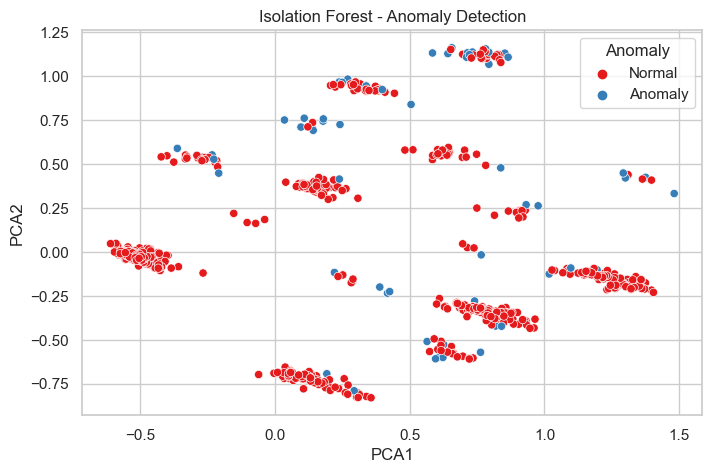

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Anomaly', palette='Set1')
plt.title("Isolation Forest - Anomaly Detection")
plt.show()